In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from DataMacpy import *

DataMacpy Setup


## Verilerimizi içeri aktaralım

In [22]:
# Veriyi içeri aktaralım.

# veri yolumuzu verelim
file_path1 = 'train.csv'

# verimizi okuyoruz. 
df1 = pd.read_csv(file_path1)

print("Setup Complete")

Setup Complete


In [23]:
# Veriyi içeri aktaralım.

# veri yolumuzu verelim
file_path2 = 'test_x.csv'

# verimizi okuyoruz. 
df2 = pd.read_csv(file_path2)

print("Setup Complete")

Setup Complete


In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
index,5460.0,2729.500000,1576.310566,0.000000,1364.750000,2729.500000,4094.250000,5.459000e+03
Yıllık Ortalama Gelir,5460.0,363571.133428,219714.442407,43922.988693,215693.439307,286925.436073,468188.221798,1.192437e+06
Yıllık Ortalama Satın Alım Miktarı,5460.0,16616.612217,14099.171704,2859.254000,4931.859057,8426.818967,30579.244695,4.860559e+04
Yıllık Ortalama Sipariş Verilen Ürün Adedi,5460.0,24.040884,14.945655,0.000000,11.550502,20.095924,35.918161,6.461620e+01
Yıllık Ortalama Sepete Atılan Ürün Adedi,5460.0,73.445693,47.214184,3.977559,25.009168,82.485579,104.473291,2.423084e+02


In [25]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2340.0,1169.500000,675.644137,0.000000,584.750000,1169.500000,1754.250000,2.339000e+03
Yıllık Ortalama Gelir,2340.0,362252.366863,223206.339620,80656.752683,212008.058731,283694.655987,466988.700685,1.229399e+06
Yıllık Ortalama Satın Alım Miktarı,2340.0,16674.303935,14266.101056,2870.657175,4807.074240,8186.095300,30747.419142,4.638054e+04
Yıllık Ortalama Sipariş Verilen Ürün Adedi,2340.0,23.465787,14.559035,0.000000,11.336283,20.094319,33.431156,6.401748e+01
Yıllık Ortalama Sepete Atılan Ürün Adedi,2340.0,72.078920,46.311708,5.283642,24.383782,71.033886,104.202802,2.377686e+02


## Bağımlı değişkenimizi ayarlayalım.

In [26]:
y_not_enc = df1["Öbek İsmi"]
y_not_enc

0       obek_4
1       obek_5
2       obek_8
3       obek_3
4       obek_3
         ...  
5455    obek_6
5456    obek_6
5457    obek_1
5458    obek_8
5459    obek_8
Name: Öbek İsmi, Length: 5460, dtype: object

In [27]:
# target verilerimiz string olduğu için LabelEncoder yapıyoruz. Her sınıfı bir sayıya atıyoruz.
l_fit = LabelEncoder().fit(y_not_enc)
y = l_fit.transform(y_not_enc)
#y = pd.DataFrame(y, columns = ["Type_1"]) # dataframe'e çevirmek için bu satırı kullanabiliriz.
y[0:20]

array([3, 4, 7, 2, 2, 7, 2, 4, 2, 5, 4, 0, 6, 2, 6, 4, 6, 5, 5, 5])

In [28]:
# labellerimizi buluyoruz.
y_label = l_fit.inverse_transform([i for i in range(max(y)+1)])
label_and_num = list(zip(y_label, [i for i in range(max(y)+1)]))
label_and_num

[('obek_1', 0),
 ('obek_2', 1),
 ('obek_3', 2),
 ('obek_4', 3),
 ('obek_5', 4),
 ('obek_6', 5),
 ('obek_7', 6),
 ('obek_8', 7)]

## Bağımsız değişkenlerimizi ayarlıyoruz.

In [29]:
# özniteliklerimizi belirleyelim.
X_not_enc1 = df1
X_not_enc1.drop(["Öbek İsmi"], axis=1, inplace=True) # tüm verilerimizden hedef kolonumuzu çıkarıyoruz.
# Number kolonumuzu da gereksiz olduğu eğitimde gereksiz olduğu için çıkarıyoruz.
X_not_enc1

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,31.356284,Etmiyor,51.600436
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,26.288620,Etmiyor,49.190536
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,5.156906,Etmiyor,9.537384
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.268016,Büyük Şehir,Ev ve Mobilya,9016.165906,39.205399,Ediyor,143.281718


In [30]:
# özniteliklerimizi belirleyelim.
X_not_enc2 = df2
X_not_enc2

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,Kadın,18-30,Bekar,Yüksekokul Mezunu,Kendi İşinin Sahibi,259190.078834,Küçük Şehir,Ev ve Mobilya,9559.156534,41.883661,Ediyor,117.627785
2336,2336,Kadın,31-40,Evli,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,194580.563177,Kırsal,Ev ve Mobilya,4070.232154,20.082996,Etmiyor,45.659622
2337,2337,Erkek,>60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,357730.521969,Büyük Şehir,Ev ve Mobilya,22589.204381,18.922305,Etmiyor,100.691379
2338,2338,Erkek,18-30,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,213179.637202,Küçük Şehir,Spor Malzemeleri,4205.390562,10.758108,Etmiyor,97.778913


In [34]:
# DataMacpy kütüphanemizdeki fonksiyon ile benzersiz birimi 0'dan fazla olan veri tipi object içeren
# kolonları buluyoruz.
object_cols, d = calc_object_cols(X_not_enc1, 0)
d

{'Cinsiyet': 2,
 'Yaş Grubu': 5,
 'Medeni Durum': 2,
 'Eğitim Düzeyi': 9,
 'İstihdam Durumu': 4,
 'Yaşadığı Şehir': 4,
 'En Çok İlgilendiği Ürün Grubu': 5,
 'Eğitime Devam Etme Durumu': 2}

In [2]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    print(X.head())

NameError: name 'X' is not defined

In [36]:
X1 = X_not_enc1
X1 = pd.get_dummies(X1, columns=object_cols, drop_first=True)
X1

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,0,748266.440879,32010.900881,37.310644,102.936904,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,246298.609605,4145.729891,11.554851,82.176053,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1
2,2,268582.732360,9924.379414,55.353236,141.661426,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,3,327721.837865,6417.780714,15.417239,17.097397,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
4,4,397431.626948,7886.663061,14.689837,20.470459,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,478054.247819,43182.299801,31.356284,51.600436,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
5456,5456,481852.853651,42107.996193,26.288620,49.190536,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
5457,5457,309443.687351,4655.392445,5.156906,9.537384,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
5458,5458,266604.268016,9016.165906,39.205399,143.281718,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
X2 = X_not_enc2
X2 = pd.get_dummies(X2, columns=object_cols, drop_first=True)
X2

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,0,365331.930346,5566.587664,15.442635,19.646460,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,1,414899.236174,6756.766203,14.957246,19.675863,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,2,152825.872271,4493.915682,10.907930,46.904518,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
3,3,489052.908472,42670.646595,32.333021,48.083609,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,4,323635.711534,5959.266948,4.519968,12.752491,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,259190.078834,9559.156534,41.883661,117.627785,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2336,2336,194580.563177,4070.232154,20.082996,45.659622,1,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
2337,2337,357730.521969,22589.204381,18.922305,100.691379,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2338,2338,213179.637202,4205.390562,10.758108,97.778913,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [38]:
# Verilerimizi train ve validation olarak ayırıyoruz.
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, train_size=0.8, test_size=0.2, random_state=0)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import lightgbm as lgb

from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

 Toplam Doğruluk: % 81.00457816679081


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.720930,129,93,36,obek_1
1,obek_2,0.687500,112,77,35,obek_2
2,obek_3,0.698413,126,88,38,obek_3
3,obek_4,0.933333,150,140,10,obek_4
4,obek_5,0.685714,140,96,44,obek_5
5,obek_6,0.944444,144,136,8,obek_6
6,obek_7,0.947712,153,145,8,obek_7
7,obek_8,0.862319,138,119,19,obek_8


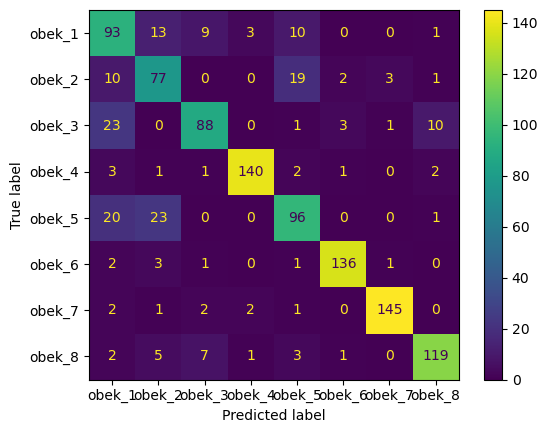

In [40]:
# KNN
model_fit_and_predict(KNeighborsClassifier(n_neighbors=3), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 90.22694536611408


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.922481,129,119,10,obek_1
1,obek_2,0.892857,112,100,12,obek_2
2,obek_3,0.904762,126,114,12,obek_3
3,obek_4,0.900000,150,135,15,obek_4
4,obek_5,0.914286,140,128,12,obek_5
5,obek_6,0.868056,144,125,19,obek_6
6,obek_7,0.895425,153,137,16,obek_7
7,obek_8,0.920290,138,127,11,obek_8


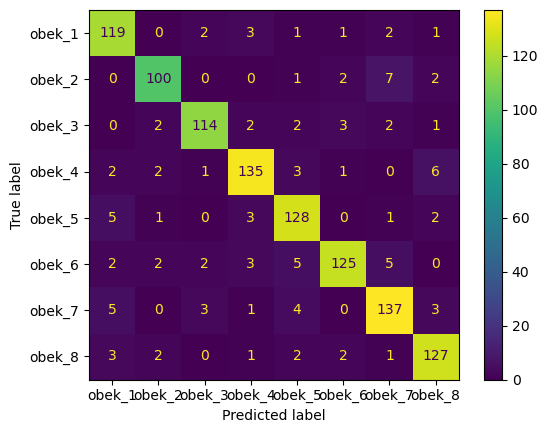

In [42]:
# DecisionTreeClassifier (DTC)
model_fit_and_predict(DecisionTreeClassifier(), y_label, X_train, y_train, X_valid, y_valid)

In [86]:
extc_params = {
    "n_estimators" : [75, 100, 150, 200, 250, 500, 1000],
    "min_samples_split" : [1.5, 3, 3.5, 2., 10, 15, 20],
}

In [87]:
extc_gscv_model = GridSearchCV( 
    RandomForestClassifier(),
    extc_params,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X_train, y_train)

extc_gscv_model.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


{'min_samples_split': 3, 'n_estimators': 150, 'n_jobs': -1, 'verbose': 1}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


 Toplam Doğruluk: % 95.4961662496141


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


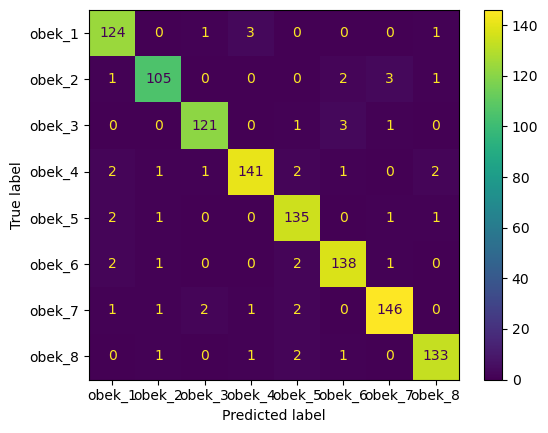

In [88]:
model_fit_and_predict(RandomForestClassifier(**extc_gscv_model.best_params_), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.4961662496141


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


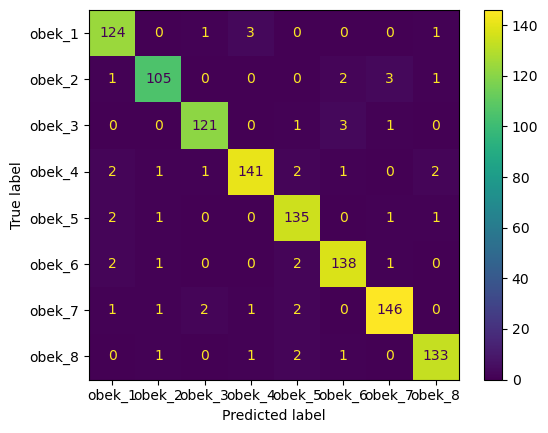

In [85]:
# RandomForestClassifier (RFC)
model_fit_and_predict(RandomForestClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.21838847183632


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.952381,126,120,6,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.950000,140,133,7,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


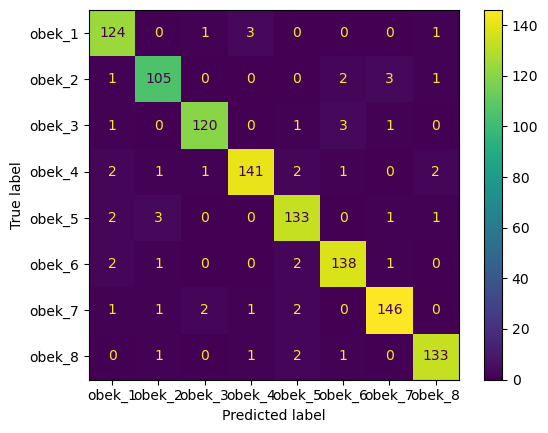

In [83]:
model_fit_and_predict(ExtraTreesClassifier(n_estimators=100), y_label, X_train, y_train, X_valid, y_valid)

[Voting] ....................... (1 of 3) Processing lr, total=  37.7s
[Voting] ....................... (2 of 3) Processing rf, total=   0.4s
[Voting] ...................... (3 of 3) Processing knn, total=   3.6s
 Toplam Doğruluk: % 95.4961662496141


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


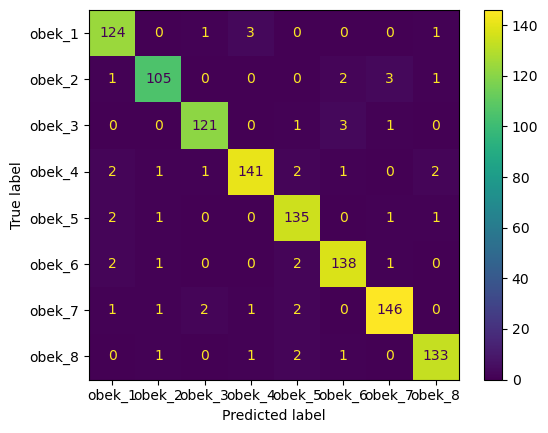

In [79]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = KNeighborsClassifier()

clf4 = LGBMClassifier()
clf5 = CatBoostClassifier(iterations=3500, task_type="GPU", verbose=0)

eclf1 = VotingClassifier(estimators=[('lr', clf5), ('rf', clf2), ('knn', clf4)], voting='soft', verbose=True)

model_fit_and_predict(eclf1, y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.4961662496141


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


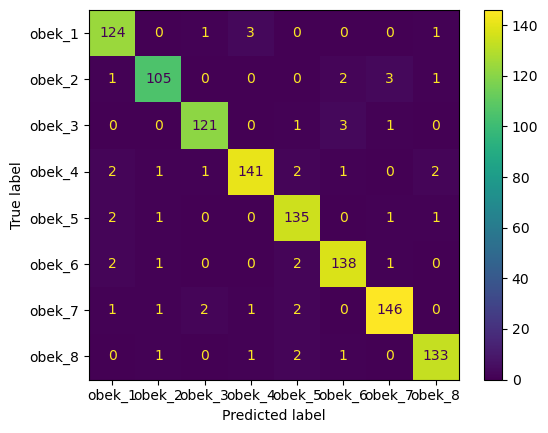

In [76]:
model_fit_and_predict(LGBMClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.30638019026281


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.952381,126,120,6,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.956522,138,132,6,obek_8


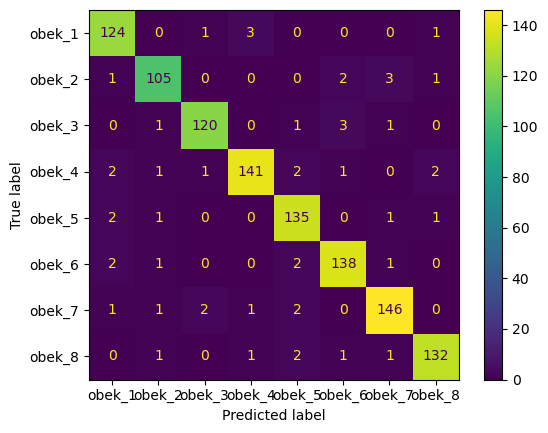

In [77]:
model_fit_and_predict(CatBoostClassifier(iterations=10000, task_type="GPU", verbose=0), y_label, X_train, y_train, X_valid, y_valid)

In [75]:
model_list = [
    
    LogisticRegression(multi_class='multinomial', random_state=1, solver="newton-cg"), # 0
    
    KNeighborsClassifier(n_neighbors=3), # 1
    
    DecisionTreeClassifier(), # 2
    
    RandomForestClassifier(), # 3
    
    ExtraTreesClassifier(), # 4
    
    HistGradientBoostingClassifier(), # 5
    
    VotingClassifier(estimators=[('lr', LogisticRegression(multi_class='multinomial', random_state=1)),
                                 ('rf', RandomForestClassifier(n_estimators=50, random_state=1)),
                                 ('dtc', DecisionTreeClassifier())],
                                 voting='soft'), # 6
    
    LGBMClassifier(), # 7
    
    CatBoostClassifier(iterations=3500, task_type="GPU", verbose=0) # 8
    
]

fast_model_select(model_list, X1, y)

Model 0 Accuracy: %81.53846153846155
Model 1 Accuracy: %79.7802197802198
Model 2 Accuracy: %70.58608058608058
Model 3 Accuracy: %95.47619047619048
Model 4 Accuracy: %95.32967032967034
Model 5 Accuracy: %91.84981684981685
Model 6 Accuracy: %85.73260073260073
Model 7 Accuracy: %92.63736263736263
Model 8 Accuracy: %94.94505494505493


In [ ]:
birinde obek8 dediğinde daha ağır sayılsın cevabı birinde daha hafif